In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

<h3> 
Principal component analysis (PCA)

Goal: reduce the number of feture but preserving information about the data (or at least a significant part)

How? Idea: Choose those directions where there is the greatest variability.
How? By projecting the data onto the eigenvectors of the covariance matrix corresponding to the largest eigenvalues.

Theorem: If the matrix is symmetric, then the eigenvectors corresponding to different eigenvalues are perpendicular.

<h4> 
PCA as a method of visualizing high-dimensional data

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [5]:
pca = PCA(2)
digits2d = pca.fit_transform(digits.data) #reducte 64 features to 2
print(digits2d.shape)

(1797, 2)


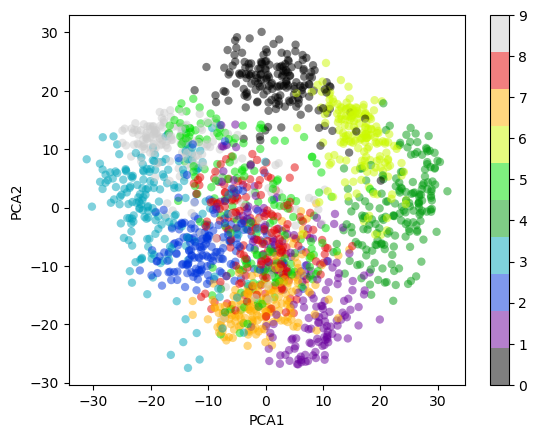

In [6]:
plt.scatter(digits2d[:,0], digits2d[:,1],
            c = digits.target, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap('nipy_spectral',10))

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()


<h4> How much information is left?

In [50]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [51]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('Eigenvalues \n%s'% eigen_vals)
# eigen_vecs

Eigenvalues 
[4.80831621 2.60374779 1.37087288 0.89730848 0.89417853 0.61503055
 0.52428622 0.09986474 0.36400572 0.1628064  0.30351535 0.23651936
 0.22610515]


In [52]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp_cum = np.cumsum(var_exp) # stepping-sum

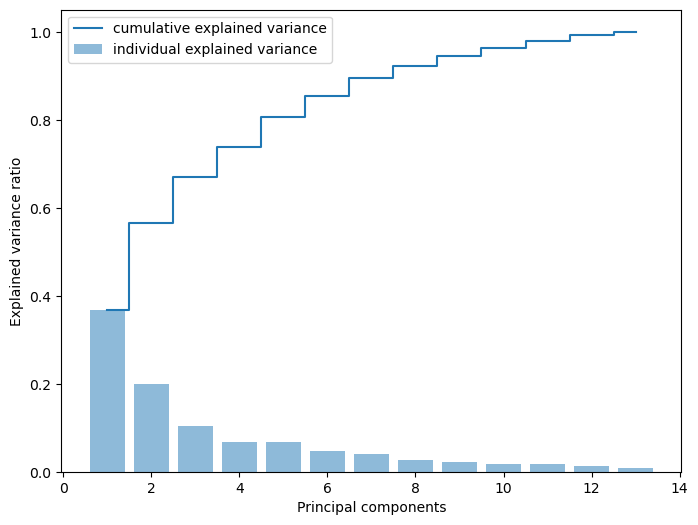

In [53]:
plt.figure(figsize=(8,6))
plt.bar( range(1, 14), var_exp,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 14), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [54]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs[0:2]

[(4.808316207963477,
  array([ 0.11764947, -0.27125589, -0.00287842, -0.2187704 ,  0.11381354,
          0.3883771 ,  0.41798859, -0.30781073,  0.31891453, -0.09956432,
          0.31677259,  0.38268756,  0.27026597])),
 (2.6037477936979085,
  array([-0.48449198, -0.22537291, -0.37849214, -0.00424088, -0.29832137,
         -0.08395627, -0.03573104, -0.05530974, -0.03466028, -0.51335364,
          0.21549584,  0.13494201, -0.37608379]))]

In [55]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)


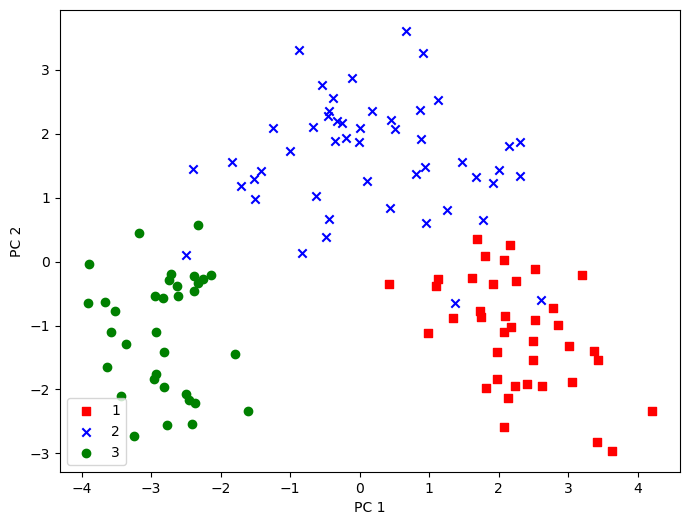

In [56]:
colors  = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
plt.figure(figsize=(8,6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Of course it's all implemented :)


In [57]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3668634 , 0.19865993, 0.10459443, 0.06846256, 0.06822375,
       0.04692541, 0.04000183, 0.02777279, 0.02315752, 0.01804588,
       0.0172513 , 0.01242175, 0.00761945])

In [58]:
print(pca.components_[:3]) #three frist components

[[ 0.11764947 -0.27125589 -0.00287842 -0.2187704   0.11381354  0.3883771
   0.41798859 -0.30781073  0.31891453 -0.09956432  0.31677259  0.38268756
   0.27026597]
 [-0.48449198 -0.22537291 -0.37849214 -0.00424088 -0.29832137 -0.08395627
  -0.03573104 -0.05530974 -0.03466028 -0.51335364  0.21549584  0.13494201
  -0.37608379]
 [-0.22676228  0.0915252   0.56611151  0.66946119  0.14770786  0.15502807
   0.14704292  0.07138073  0.04901835 -0.18399456  0.08151526  0.17418972
  -0.16040494]]


We usually take the number of components so that the total explained variance is at least 80-90\%

<h4> 
Exercise1: Is it possible that the first two components explain 100% of the variance of the 5D data? If not - prove, if yes - give an example.

In [118]:
# covariance matrix
covariance = np.array([[1, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0],
                       [0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0]])

# generate random data based on the covariance matrix
np.random.seed(0)
data = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0], cov=covariance, size=100)

# PCA 
pca = PCA(n_components=5)
pca.fit(data)

# transformed data
transformed_data = pca.transform(data)

# explained variance ratio
evr = pca.explained_variance_ratio_
print("explained variance ratio:", evr)


explained variance ratio: [0.53710514 0.46289486 0.         0.         0.        ]


In [120]:
data[:3,:]

array([[ 0.40015721,  1.76405235,  0.        ,  0.        ,  0.        ],
       [ 0.95008842, -0.97727788,  0.        ,  0.        ,  0.        ],
       [ 1.45427351,  0.14404357,  0.        ,  0.        ,  0.        ]])

in this dataset, the explained variance ratio for the two first components sum up to 100%. this is only possible because no features have covariance, the first two features each have a variance of 1 and the other features don't vary. if you check the data, the three last features are have values = 0, which means they don't really matter. so the dimensionality of this dataset is in reality smaller. since the only way 2 PCs can explain 100% of variance in a 5-feature data is when only two features matter and PCA assumes dependency between features, the conclusion is that it is not possible for two PCs to explain 100% of variance in a 5 dimensional dataset.

<h4> Exercise2: Consider the $iris$ data. Standardize it and then run the PCA algorithm. How many components describe this data well enough? Build SVM classifier on new set of features (reduced). Comment your results.

In [85]:
from sklearn import datasets

# load dataset
iris = datasets.load_iris()
X_raw = iris.data
y = iris.target

# standardize
means = np.mean(X_raw, axis = 0)
stds = np.std(X_raw, axis = 0)

X = (X_raw-means)/stds

In [86]:
pca = PCA(n_components = None)
X_pca = pca.fit_transform(X) 
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)
cum_var

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

<font size='4'> the first two components explain well </font>

In [92]:
evr = pca.explained_variance_/sum(pca.explained_variance_)
print(evr)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [23]:
# rotation matrix
print(pca.components_) 

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'real labels')

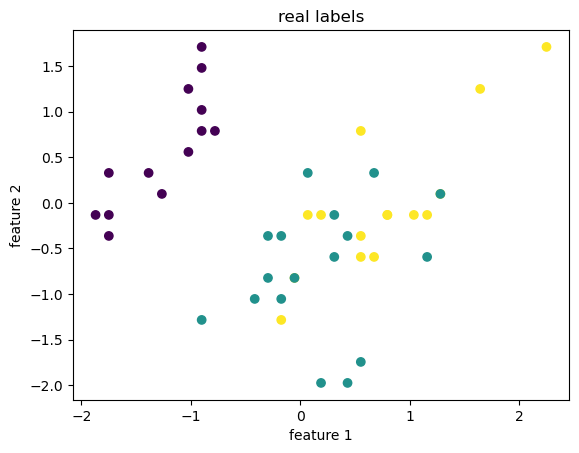

In [70]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('real labels')

Text(0.5, 1.0, 'SVC RBF kernel prediction')

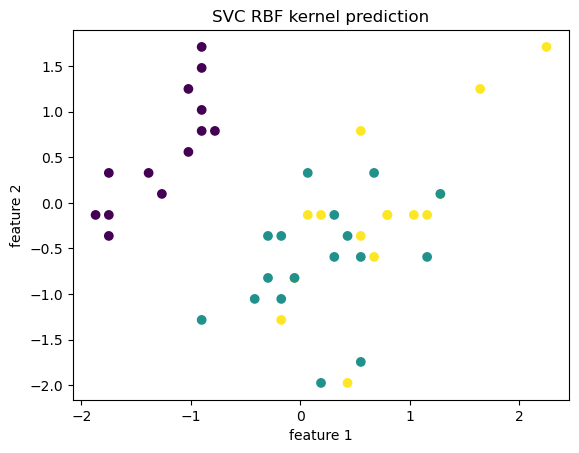

In [69]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('SVC RBF kernel prediction')

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rbf_accuracy = accuracy_score(y_test, y_pred)
rbf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))


Accuracy (RBF Kernel):  95.56
F1 (RBF Kernel):  95.56


<h4> Exericse3: Consider again the face data of different people (fetch_lw_people) considered during the SVM exercise. Apply the same as then PCA with 150 components. What percentage of variance do these components describe? Draw some initial components (eigenvectors); of course, like the images, they are $64\cdot47$ dimensional vectors - you need to use the reshape method before drawing. Consider their interpretation.

In [93]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
X = faces.data
y = faces.target
print(faces.images.shape)

(1348, 62, 47)


In [94]:
pca = PCA(n_components = 150)
X_pca = pca.fit_transform(X) 
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)
cum_var

array([0.18782705, 0.3333305 , 0.40433162, 0.46462166, 0.51502323,
       0.54438543, 0.56907827, 0.5895561 , 0.6092423 , 0.62815666,
       0.6437691 , 0.6584683 , 0.6706131 , 0.6815707 , 0.6919989 ,
       0.7017188 , 0.7107871 , 0.71955717, 0.7276877 , 0.73473495,
       0.74156356, 0.7480424 , 0.7540774 , 0.7598613 , 0.7651839 ,
       0.77039075, 0.775391  , 0.7801555 , 0.78467983, 0.7889319 ,
       0.79298353, 0.7967842 , 0.80038285, 0.80389154, 0.80736977,
       0.8106186 , 0.8137633 , 0.8168682 , 0.81994504, 0.82284427,
       0.82567036, 0.82841784, 0.83114594, 0.83374566, 0.83621114,
       0.8385931 , 0.8409436 , 0.8432588 , 0.84553146, 0.84774977,
       0.8498554 , 0.8519134 , 0.85394335, 0.8559498 , 0.85790735,
       0.8598617 , 0.8617426 , 0.8635703 , 0.8653372 , 0.86709577,
       0.86884505, 0.87050825, 0.87212133, 0.873707  , 0.87527275,
       0.8768016 , 0.87830144, 0.87976265, 0.8812153 , 0.8826257 ,
       0.8840309 , 0.885395  , 0.88675624, 0.8880725 , 0.88936

In [99]:
eigen_vecs = pca.components_

In [142]:
pcs = cum_var[cum_var <= 0.81]
len(pcs)
# around 35 components are relevant

35

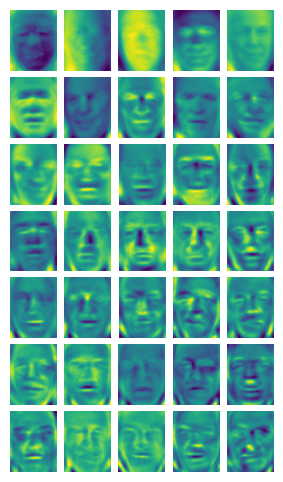

In [143]:
import matplotlib.pyplot as plt

# plot 35 images
fig, axs = plt.subplots(7, 5)

images = []
for i in range(len(pcs)):
    # get component, reshape as image and append to images list
    ev = eigen_vecs[i].reshape((62, 47))
    images.append(ev)
    
# show images
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])  
    ax.axis('off')

fig.subplots_adjust(hspace=0.1, wspace=0)
fig.set_size_inches(3.5, 6)  
plt.show()
    

<font size='4'>the images show patterns that contribute to the variation of faces, like the orientation of the face, light and shadow, face shape and expression. the lighter part of each image represents where the component is present, and the darker part represents where the component is not present</font>

<h3> PCA with kernel

<h4> Example1

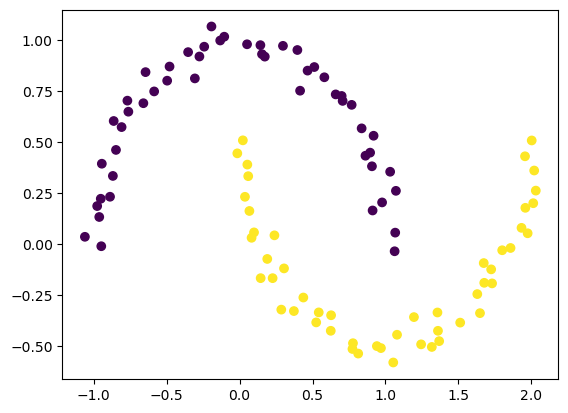

In [26]:
X, y = make_moons(n_samples=100, random_state=123, noise = 0.05)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [27]:
pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)

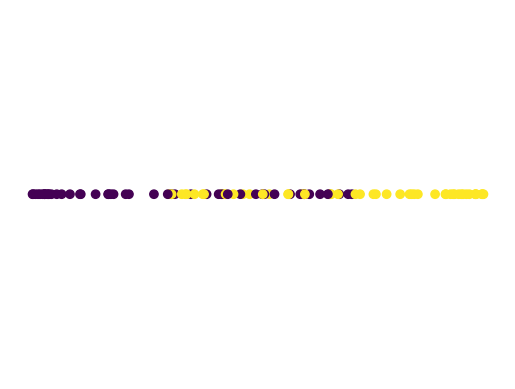

In [28]:
z = np.ones(np.shape(Xpca))
plt.scatter(Xpca,z, c = y)
plt.axis("off")
plt.show()

<h4> Example2

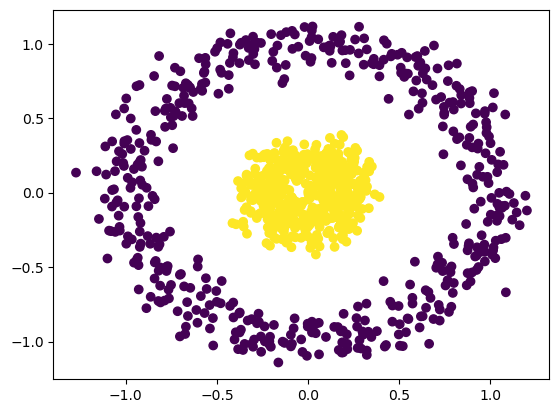

In [29]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

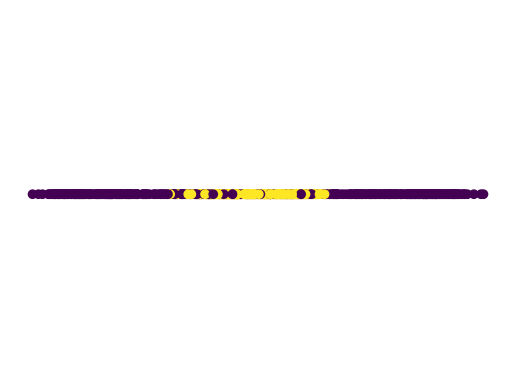

In [30]:
pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)

z = np.ones(np.shape(Xpca))
plt.scatter(Xpca,z, c = y)
plt.axis("off")
plt.show()

In [31]:
#we can deal with the second example
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
Xpcakernel = scikit_kpca.fit_transform(X)

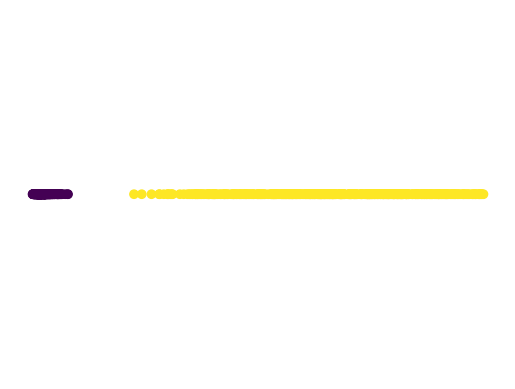

In [32]:
z = np.ones(np.shape(Xpcakernel))
plt.scatter(Xpcakernel,z, c = y)
plt.axis("off")
plt.show()

<h3> ICA

- We assume that we have a linear mixture of independent signals (e.g. voices of several people speaking simultaneously; the so-called cocktail party problem). The goal: to find these (original) signals


<center> $x=As$

$A$ - mixing matrix (unknown), $s$ - original signals (uknonwn), $x$ - observed (known)

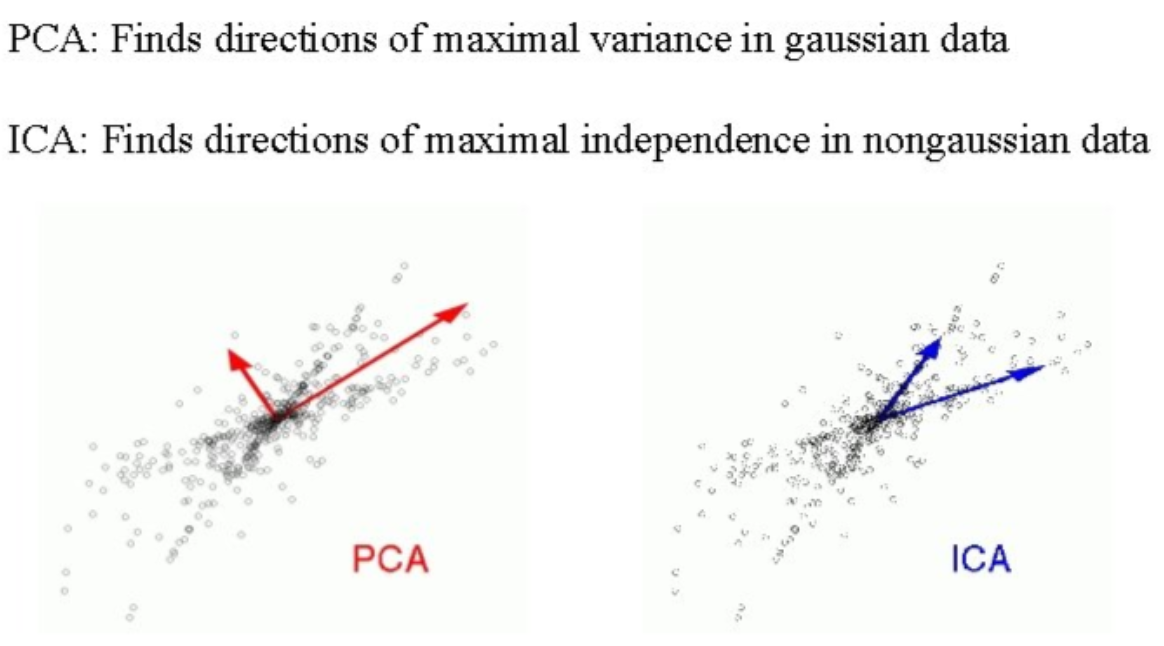

In [41]:
display.Image("icapca.png", width="800", height="500")

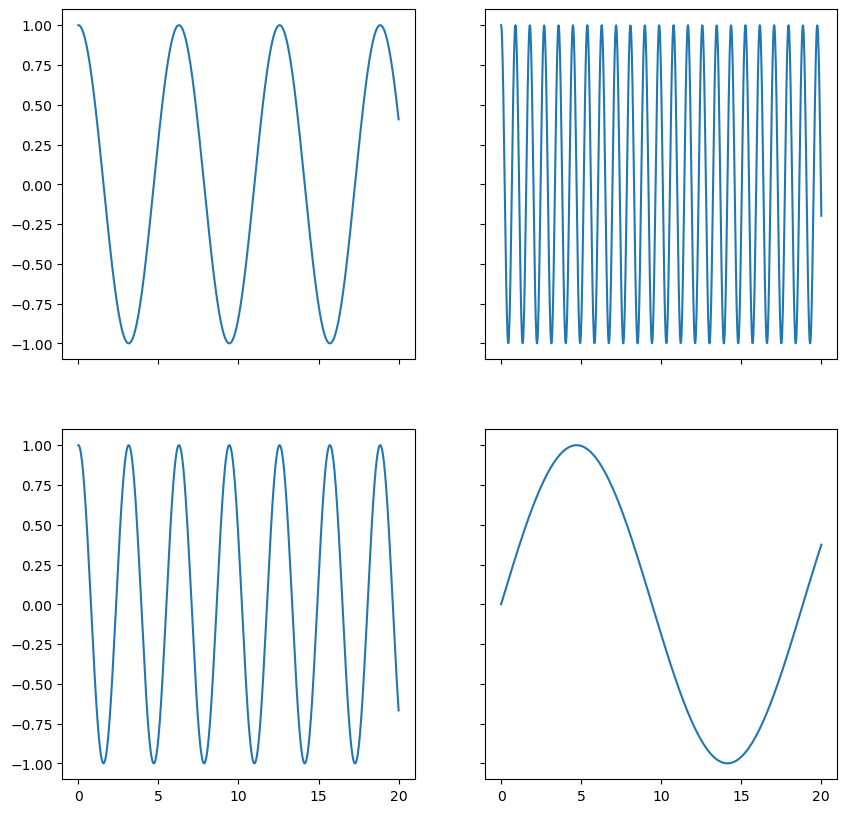

In [4]:
n = 1000
x = np.linspace(0, 20, n)
y1 = np.cos(x)
y2 = np.cos(2*x)
y3 = np.sin(x/3)
y4 = np.cos(7*x)

fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,y1)
ax[1,0].plot(x,y2)
ax[1,1].plot(x,y3)
ax[0,1].plot(x,y4)

plt.show()

[[0.13152259 0.60501854 0.68836356 0.44858443]
 [0.54976907 0.6281734  0.31937213 0.70007032]
 [0.1303531  0.82741513 0.11424509 0.21796665]
 [0.7871163  0.74966501 0.91192648 0.75098607]]


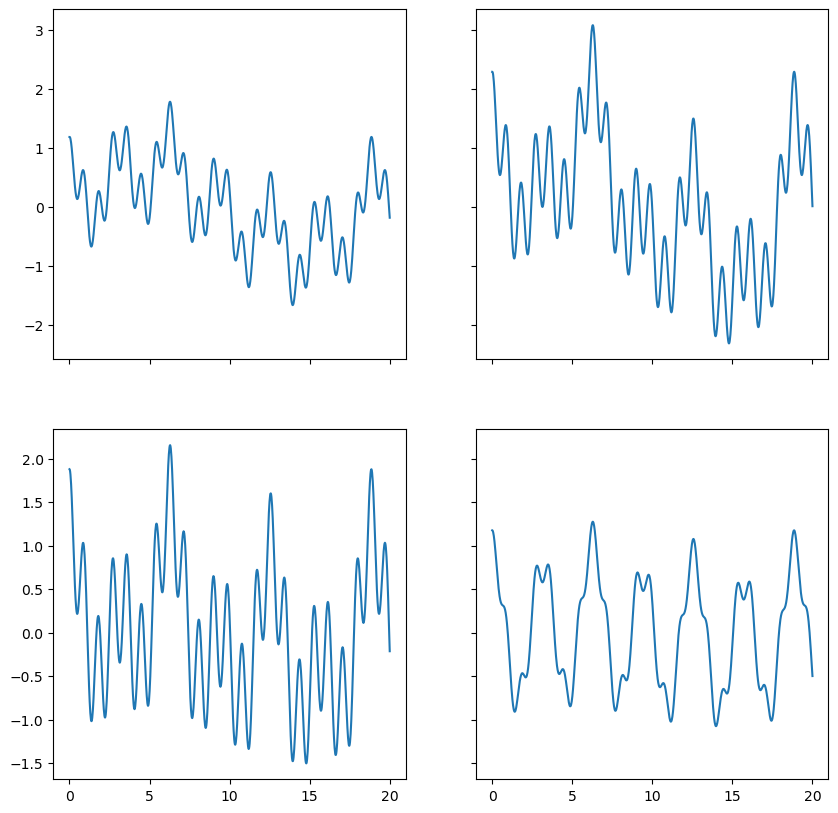

In [5]:
#create mixtures

A = np.random.rand(4,4)

print(A)

z1 = A[0][0]*y1+A[0][1]*y2+A[0][2]*y3+A[0][3]*y4
z2 = A[1][0]*y1+A[1][1]*y2+A[1][2]*y3+A[1][3]*y4
z3 = A[2][0]*y1+A[2][1]*y2+A[2][2]*y3+A[2][3]*y4
z4 = A[3][0]*y1+A[3][1]*y2+A[3][2]*y3+A[3][3]*y4

fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,z1)
ax[1,0].plot(x,z2)
ax[1,1].plot(x,z3)
ax[0,1].plot(x,z4)

plt.show()

In [7]:
X = pd.DataFrame({"z1":z1, "z2":z2, "z3":z3, "z4":z4})

In [8]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components = 4, whiten = "arbitrary-variance")
ica.fit(X)
y_ica = ica.transform(X)

In [9]:
print(ica.mixing_)

[[-15.06607004  10.18417461 -13.14317153  -3.81078856]
 [ -7.19602379  15.83136457 -13.3473422  -13.2760633 ]
 [ -2.55261135   5.08870935 -18.18673833  -4.06299283]
 [-20.17126947  17.01378165 -15.90032343 -18.7895126 ]]


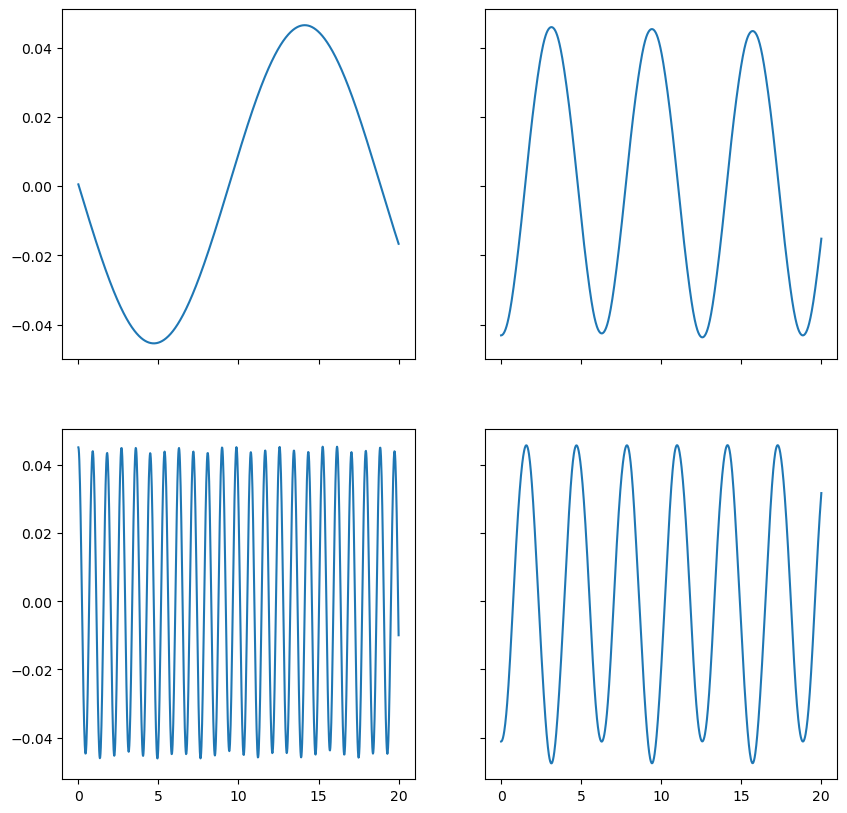

In [10]:
fig, ax = plt.subplots(2, 2, sharex = "col", sharey = "row", figsize = (10,10))

ax[0,0].plot(x,y_ica[:,0])
ax[1,0].plot(x,y_ica[:,1])
ax[1,1].plot(x,y_ica[:,2])
ax[0,1].plot(x,y_ica[:,3])

plt.show()

<h4> Exercise4: Notice that these plots differ in the range of values compared to original signals - is that understandable?

the original functions are trigonometric, which ranges from -1 to 1. the transformed signals from ICA (y_ica) don't have predefined ranges, they result from mathematical computations and depend on data and mixings (ica.mixing_). 

How to use it for dimensionality reduction?

In [32]:
# impact for each component
abs_mixing = np.abs(ica.components_)
impacts = np.sum(abs_mixing, axis=1)

# get 2 highest impacts
sorted_indices = np.argsort(impacts)[::-1]
selected_components = sorted_indices[:2]

# select components
reduced = y_ica[:, selected_components]

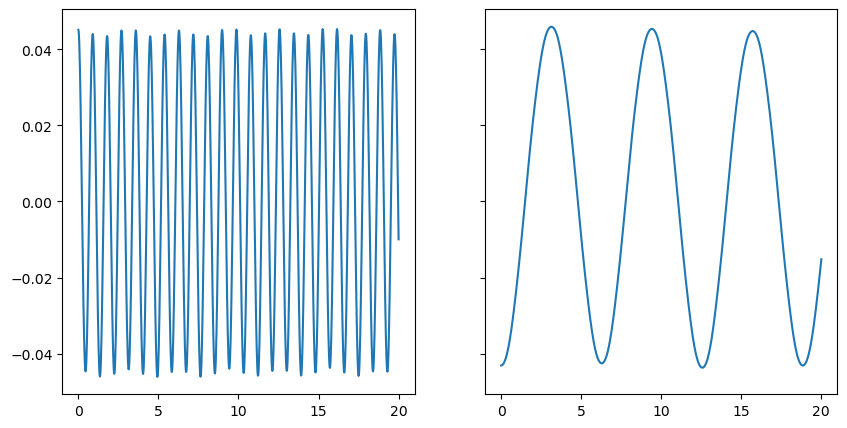

In [45]:
fig, ax = plt.subplots(1, 2, sharex = "col", sharey = "row", figsize = (10,5))

ax[0].plot(x,reduced[:,0])
ax[1].plot(x,reduced[:,1])

plt.show()

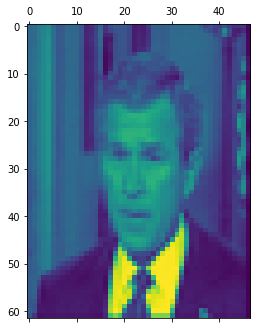

In [32]:
plt.matshow(faces.data[1].reshape(62,47))
plt.show()

In [33]:
ica.mixing_

array([[  7.08870652,  13.20756099,  18.97676942, -19.67706089],
       [ 16.31945796,  16.87076274,  18.45624731,  -8.44390812],
       [ 12.35009284,  11.69722421,   9.21897087,  -4.51612157],
       [  7.13198178,   8.14530991,  15.11340895, -14.5577814 ]])

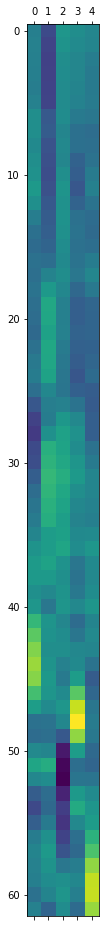

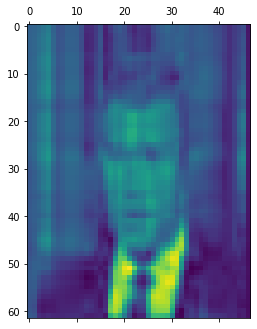

In [35]:
ica = FastICA(n_components = 5, whiten = "arbitrary-variance")
ica.fit(faces.data[1].reshape(62,47))

plt.matshow(ica.fit_transform(faces.data[1].reshape(62,47)))

image_restored = ica.inverse_transform(ica.fit_transform(faces.data[1].reshape(62,47)))

plt.matshow(image_restored)
plt.show()

Comment: the columns in the picture are a linear combination of these 5 independent vectors


ICA application:
- processing of medical signals (fMRI, ECG, EEG)
- Brain Computer Interface
- time series analysis (e.g. in finance)

and many others

<h3> Supplementary material

PCA performs worse with non-linear relationships. The solution is a class of methods considering the so-called manifolds (manifold learning). The goal is the same, low-dimensional representation of high-dimensional data.


Examples: Multidimensional scaling (MDS), locally linear embedding (LLE), isometric mapping (IsoMap)

There are also methods that take into account information about classes (if known)


<h4> Linear Discriminant Analysis (LDA) - supervised learning

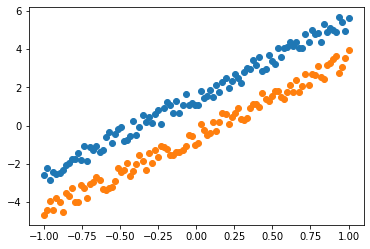

In [36]:
rng = np.random.RandomState(1)
x = np.linspace(-1, 1, 100)
y1 = 4*x+1+rng.random(100)
y2 = 4*x-1+rng.random(100)

X = np.array((np.append(x, x),np.append(y1, y2))).T
label = np.array([0]*100+[1]*100)
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.show()

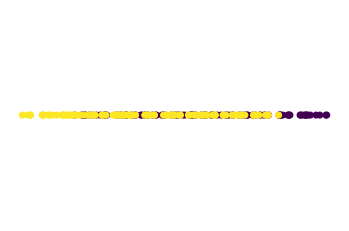

In [37]:
#PCA

pca = PCA(1)
X1dpca = pca.fit_transform(X) 

z = np.ones(np.shape(X1dpca))
plt.scatter(X1dpca,z, c = label)
plt.axis("off")
plt.show()

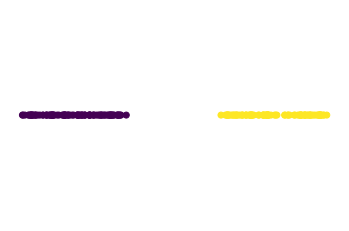

In [38]:
#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X1dlda = lda.fit_transform(X, label)

z = np.ones(np.shape(X1dlda))
plt.scatter(X1dlda,z, c = label)
plt.axis("off")
plt.show()